<a href="https://colab.research.google.com/github/KacperKaszuba0608/Projects-R/blob/main/Investigating_COVID_19_Virus_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigating COVID-19 Virus Trends
Kacper Kaszuba

## Introducion

In this project I will analys dataset from COVID19 Worldwide Testing Data. Dataset is abailable on Kaglle at this [link](https://www.kaggle.com/datasets/lin0li/covid19testing). I main purpose of this project is: "**Which countries have had the highest number of positive cases against the number of tests?**". The columns of data are described below:

* `Date` - date of collecting record
* `Country_Region` - names of country in world
* `Province_State` - names of state in country if exists if not value equals 'All States'
* `postitive` - cumulative number of positive cases reported
* `active` - number of actively cases on that day
* `hospitalized` - cumulative number of hospitalized cases reported 
* `hospitalizedCurr` - number of actively hospitalized cases on that day
* `recovered` - cumulative number of recovered cases reported
* `death` - cumulative number of deaths reported
* `total_tested` - cumulative number of tests conducted
* `daily_tested` - number of tests conducted on the day; if daily data is unavailable, daily tested is averaged across number of days in between
* `daily_positive` - number of positive cases reported on the day; if daily data is unavailable, daily positive is averaged across number of days in between

Whole project was written in Rmarkdown wirh R language.

## Loading necessary libraries and reading in dataset

In [ ]:
library(readr)
library(tidyverse)
library(tibble)
library(knitr)

# Reading in file from my github repository
df <- read_csv('https://raw.githubusercontent.com/KacperKaszuba0608/Datasets/main/covid19.csv')

Rows: 10903 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Continent_Name, Two_Letter_Country_Code, Country_Region, Province_...
dbl  (9): positive, hospitalized, recovered, death, total_tested, active, ho...
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Getting some informations about data


In [ ]:
# Checking how much date I have
dim(df)

[1] 10903    14

As we see above I have 10903 rows and 14 columns of data. Now let's check the names of each column.


In [ ]:
# Getting names of column
colnames(df)

[1] "Date"                    "Continent_Name"         
 [3] "Two_Letter_Country_Code" "Country_Region"         
 [5] "Province_State"          "positive"               
 [7] "hospitalized"            "recovered"              
 [9] "death"                   "total_tested"           
[11] "active"                  "hospitalizedCurr"       
[13] "daily_tested"            "daily_positive"

Next steps are check first few rows and types of each column.


In [ ]:
# First 5 rows
head(df)

Date,Continent_Name,Two_Letter_Country_Code,Country_Region,Province_State,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive
<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-01-20,Asia,KR,South Korea,All States,1,0,0,0,4,0,0,0,0
2020-01-22,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
2020-01-22,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0
2020-01-23,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
2020-01-23,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0
2020-01-24,Asia,KR,South Korea,All States,2,0,0,0,27,0,0,5,0


In [ ]:
# Types of columns
glimpse(df)

Rows: 10,903
Columns: 14
$ Date                    <date> 2020-01-20, 2020-01-22, 2020-01-22, 2020-01-2…
$ Continent_Name          <chr> "Asia", "North America", "North America", "Nor…
$ Two_Letter_Country_Code <chr> "KR", "US", "US", "US", "US", "KR", "US", "US"…
$ Country_Region          <chr> "South Korea", "United States", "United States…
$ Province_State          <chr> "All States", "All States", "Washington", "All…
$ positive                <dbl> 1, 1, 1, 1, 1, 2, 1, 1, 4, 0, 3, 0, 0, 0, 0, 1…
$ hospitalized            <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ recovered               <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ death                   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ total_tested            <dbl> 4, 1, 1, 1, 1, 27, 1, 1, 0, 0, 0, 0, 0, 0, 0, …
$ active                  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ hospitalizedCurr        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ daily_tested 

As we see above most of columns are double, first one is date class and every column about country or state are character class. We can see informations about number of rows and columns - rows: 10,903 and columns: 14.

## Isolation the Rows I Need

Now, I have to isolate the rows which I need. The first one cryterium is keepping only the data related to "All States". "All States" represents the value of the column Province_State to specify that the COVID-19 data is only available at the country level. 

In [ ]:
# Filtering rows and removing column Province_State
df_all_states <- df %>% 
  filter(Province_State == 'All States') %>%
  select(-Province_State)

Above I filter dataframe with `filter` function and then remove `Province_State` column because I don't need it to my analys. Then I store the result to variable named df_all_states.

After filtering data I extract columns realated to daily measures because if we made the mistake of comparing a column containing cumulative data and another one containing only one-day data our analysis would be biased. I chose following columns:

1. Date
2. Country_Region
3. active
4. hospitalzedCurr
5. daily_tested
6. daily_positive

In [ ]:
#Selecting needed columns
df_all_states_daily <- df_all_states %>%
  select(Date, Country_Region, active, hospitalizedCurr, daily_tested, daily_positive)

## Extracting the Top Ten Tested Cases Countries

Aim in this part is extract **top ten cases countries data** 

In [ ]:
# Grouping data, calculating sums and ordering data by tested value
df_all_states_daily_sum <- df_all_states_daily %>% 
  group_by(Country_Region) %>% 
  summarise(tested = sum(daily_tested), 
            positive = sum(daily_positive),
            active = sum(active),
            hospitalized = sum(hospitalizedCurr)) %>% 
  arrange(-tested)

df_all_states_daily_sum

Country_Region,tested,positive,active,hospitalized
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
United States,17282363,1877179,0,0
Russia,10542266,406368,6924890,0
Italy,4091291,251710,6202214,1699003
India,3692851,60959,0,0
Turkey,2031192,163941,2980960,0
Canada,1654779,90873,56454,0
United Kingdom,1473672,166909,0,0
Australia,1252900,7200,134586,6655
Peru,976790,59497,0,0


In [ ]:
# Taking the top 10 countries
top_10 <- head(df_all_states_daily_sum, 10)
kable(top_10, caption = 'Top 10 Countries')



Table: Top 10 Countries

|Country_Region |   tested| positive|  active| hospitalized|
|:--------------|--------:|--------:|-------:|------------:|
|United States  | 17282363|  1877179|       0|            0|
|Russia         | 10542266|   406368| 6924890|            0|
|Italy          |  4091291|   251710| 6202214|      1699003|
|India          |  3692851|    60959|       0|            0|
|Turkey         |  2031192|   163941| 2980960|            0|
|Canada         |  1654779|    90873|   56454|            0|
|United Kingdom |  1473672|   166909|       0|            0|
|Australia      |  1252900|     7200|  134586|         6655|
|Peru           |   976790|    59497|       0|            0|
|Poland         |   928256|    23987|  538203|            0|

Now, let's visualize how many tested people have each country from the top 10.


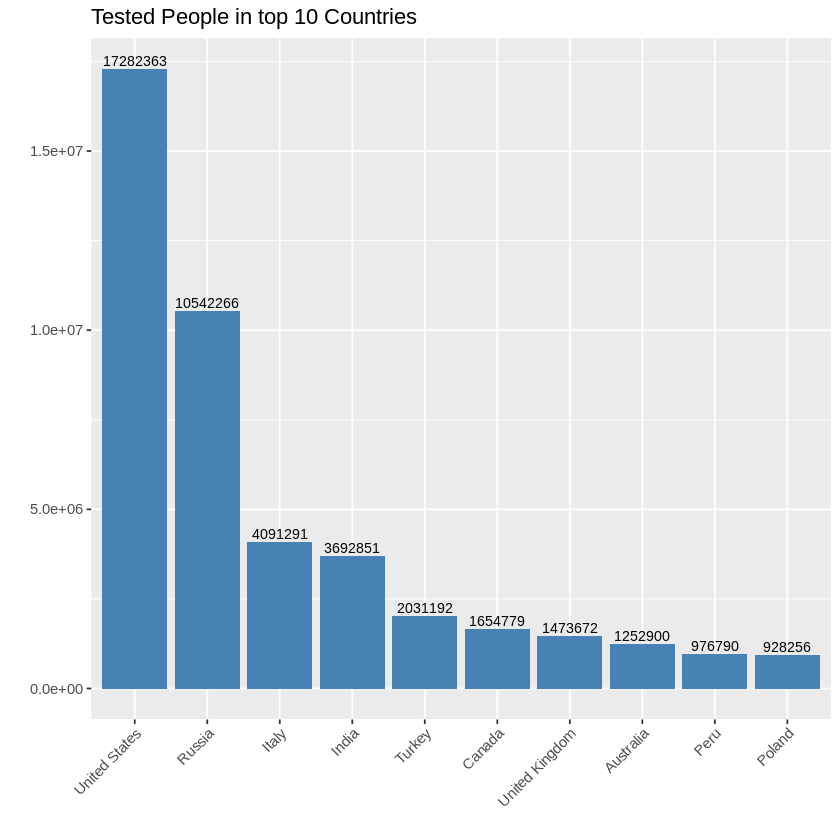

In [ ]:
ggplot(data = top_10, aes(x=reorder(Country_Region, -tested), y=tested))+
  geom_bar(stat="identity", fill="steelblue")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))+
  ylab('')+
  xlab('')+
  geom_text(aes(label = tested), vjust = -0.3, size = 3)+
  ggtitle('Tested People in top 10 Countries')

# Calculating Ratio of Positive Against Tested Cases

Now let's calcualte teh ratio of positive against tested cases. I chose the top three countries. To do this I have to divide positive vector by tested vector, then choose top three.

In [ ]:
# Extarcting vectors from dataframe
countries <- top_10$Country_Region
tested <- top_10$tested
positive <- top_10$positive
active <- top_10$active
hospitalized <- top_10$hospitalized

# Adding names to vectors
names(tested) <- countries
names(positive) <- countries
names(active) <- countries
names(hospitalized) <- countries

# Calculating ratio of positive against tested cases
top_3 <- top_10 %>%
  group_by(Country_Region) %>%
  summarize(Ratio = round(positive / tested,3),
            tested = tested,
            positive = positive,
            active = active,
            hospitalized = hospitalized) %>%
  arrange(-Ratio) %>%
  head(3)
(top_3 <- data.frame(top_3))

Country_Region,Ratio,tested,positive,active,hospitalized
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
United Kingdom,0.113,1473672,166909,0,0
United States,0.109,17282363,1877179,0,0
Turkey,0.081,2031192,163941,2980960,0


Above we have 3 countries with best ratio of positive against tested cases. The order is as follows:

1. UNITED KINGDOM   **0.1133**
2. UNITED STATES    **0.1086**
3. TURKEY           **0.0871**

And this my answer on my aim of this project which was: **Which countries have had the highest number of positive cases against the number of tests?**

Below I want to show you all results in one simple list as effect of my project.

In [ ]:
question <- "Which countries have had the highest number of positive cases against the number of tests?"
answer <-  c("Positive tested cases" = top_3)
data_structure_list <- list('dataframes' = list(df, df_all_states, df_all_states_daily, df_all_states_daily_sum, top_10),
                         'vectors' = list(countries, tested, positive, active, hospitalized))

covid_analysis_list <- list('question'=question, 'answer'=answer, data_structure_list)